# 2장 코드 따라하기

## 2.3.1 예제에 사용할 dataset

### - forge dataset은 인위적으로 만든 이진 분류 dataset입니다.

In [1]:
# %load basic.py
from IPython.display import display
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


X.shape : (26, 2)


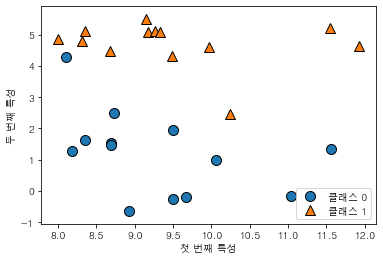

In [2]:
# dataset을 만듭니다.
X, y = mglearn.datasets.make_forge()

# 산점도를 그립니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc = 4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape :", X.shape)
plt.show();

### - wave dataset은 회귀 알고리즘 설명을 위해 인위적으로 만든 dataset입니다.

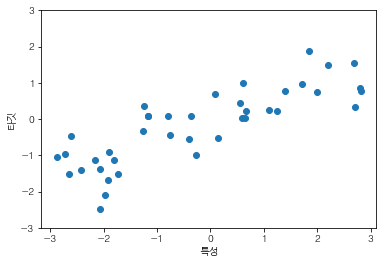

In [3]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")
plt.show();

### - 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암 dataset

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys :\n", cancer.keys())

cancer.keys :
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print("유방암 데이터의 형태 :", cancer.data.shape)

유방암 데이터의 형태 : (569, 30)


In [7]:
print("클래스별 샘플 갯수 :\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 갯수 :
 {'malignant': 212, 'benign': 357}


malignant는 악성, benign은 양성

In [8]:
print("특성 이름 :\n", cancer.feature_names)

특성 이름 :
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### - 1970년대 보스턴 주택가격 dataset (회귀)

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태 :", boston.data.shape)

데이터의 형태 : (506, 13)


In [11]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape :", X.shape)

X.shape : (506, 104)


## 2.3.2 k-최근접 이웃 ( KNN 알고리즘 )

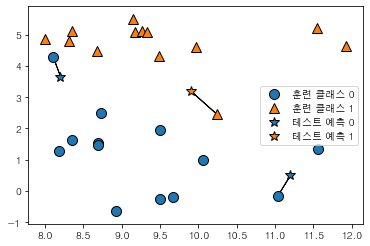

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

1. 별 모양 데이터 포인트 3개 추가
2. 별과 가장 가까운 훈련 데이터 포인트 연결

-> 1-최근접 이웃 알고리즘의 예측은 같은색으로 연결한 포인트

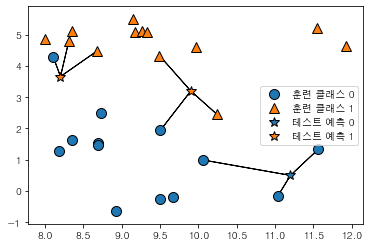

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

1. 별 모양 데이터 포인트 3개 추가
2. 별과 가장 가까운 훈련 데이터 포인트 3개와 연결

-> 3-최근접 이웃 알고리즘의 예측은 1-최근접 이웃알고리즘의 예측결과와 다른 별 포인트가 생김!!

In [14]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [16]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [17]:
print("테스트 세트 예측 :", clf.predict(X_test))

테스트 세트 예측 : [1 0 1 0 1 0 0]


In [19]:
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.86


### KNeighborsClassifier 분석

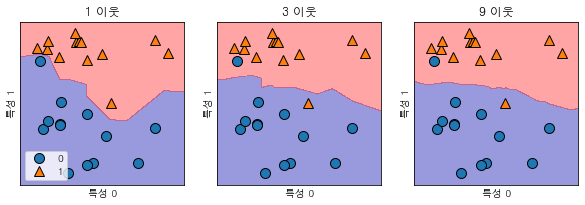

In [20]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n, ax in zip([1, 3, 9], axes):
    #fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors = n).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} 이웃".format(n))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc = 3)
plt.show();

이웃의 수를 늘릴수록 결정 경계는 부드러워진다  ->  단순한 모델 (복잡도가 낮아짐)

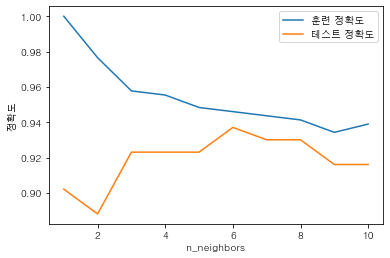

In [21]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
n_settings = range(1, 11)
for n in n_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train, y_train)
    
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(n_settings, training_accuracy, label = "훈련 정확도")
plt.plot(n_settings, test_accuracy, label = "테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend();

### k-최근접 이웃 회귀

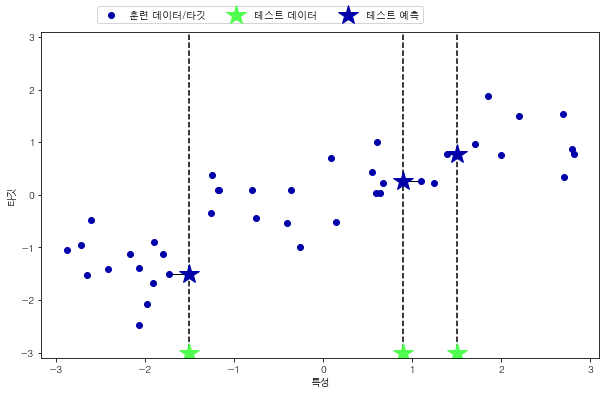

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

1. 별 모양 데이터 포인트 3개 추가
2. 별과 가장 가까운 타깃값과 연결

-> 1-최근접 이웃 알고리즘의 예측은 그냥 가장 가까운 타깃값

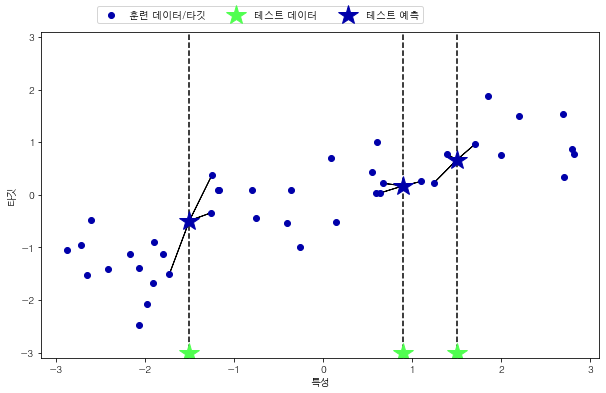

In [23]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

1. 별 모양 데이터 포인트 3개 추가
2. 별과 가장 가까운 3개의 타깃값과 연결

-> 3-최근접 이웃 알고리즘의 예측은 3개의 가장 가까운 타깃값의 평균!!

In [25]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

# wave dataset을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors = 3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [29]:
print("테스트 세트 예측 :\n", reg.predict(X_test))

테스트 세트 예측 :
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


결정 계수 R^2값은 보통 0과 1사이의 값
- 1은 예측이 완벽한 경우, 0은 훈련 세트의 출력값의 평균으로만 예측한 경우
- 음수값은 예측과 타깃이 상반된 경향을 가지는 경우

In [32]:
print("테스트 세트 R^2 : {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2 : 0.83


### KNeighborsRegressor 분석

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

# -3과 2 사이에 1,000개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n, ax in zip([1, 3, 9], axes):
    #1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeghborsRegressor(n_neighbors = n)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title("{} 이웃의 훈련 스코어 : {.2f}, 테스트 스코어 : {.2f}".format(n, reg.score()))